# MASINSKO UCENJE PRVI PROJEKAT
---
*Nada Jovanovic 1618*    
*Milica Jovanovic 1636*  



 ## Import

In [140]:
from matplotlib import pyplot
import pandas as pd

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.naive_bayes import BernoulliNB


from sklearn.metrics import accuracy_score, classification_report




## Prikaz podataka

In [141]:
data = pd.read_csv("data.csv")
data1 = pd.read_csv("data.csv")
data.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


> ### Znacenje firca
>

|   |   |   |   |
|---|---|---|---|
| PRE7  | Feature	Binary  |  Pain before surgery | (T,F)   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |
|   |   |   |   |




> 1. Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any  
> 2. **PRE4**	Feature	Continuous		Forced vital capacity - FVC (numeric)  
> 3. PRE5	Feature	Continuous		Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)  
> 4. PRE6	Feature	Categorical		Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)    	
>PRE7	Feature	Binary		Pain before surgery (T,F)    
>PRE8	Feature	Binary		Haemoptysis before surgery (T,F)  		
>PRE9	Feature	Binary		Dyspnoea before surgery (T,F)  		
>PRE10	Feature	Binary		Cough before surgery (T,F)  	
>PRE11	Feature	Binary		Weakness before surgery (T,F)  
>PRE14	Feature	Categorical		T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) 
(OC11,OC14,OC12,OC13)  
>PRE17	Feature	Binary		Type 2 DM - diabetes mellitus (T,F)  
>PRE19	Feature	Binary		MI up to 6 months (T,F)  
>PRE25	Feature	Binary		PAD - peripheral arterial diseases (T,F)  
>PRE30	Feature	Binary		Smoking (T,F)  
>**PRE32**	Feature	Binary		Asthma **(T,F)**  
>AGE	Feature	Integer	Age	Age at surgery (numeric)  
>Risk1Yr	Target	Binary		1 year survival period - (T)rue value if died (T,F)  


In [142]:
print("Number Of Rows In The Original DataFrame:", len(data))
print("Number Of Rows After Deduping:", len(data.drop_duplicates()))

Number Of Rows In The Original DataFrame: 470
Number Of Rows After Deduping: 470


In [143]:
data.info()
data.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DGN      470 non-null    object 
 1   PRE4     470 non-null    float64
 2   PRE5     470 non-null    float64
 3   PRE6     470 non-null    object 
 4   PRE7     470 non-null    object 
 5   PRE8     470 non-null    object 
 6   PRE9     470 non-null    object 
 7   PRE10    470 non-null    object 
 8   PRE11    470 non-null    object 
 9   PRE14    470 non-null    object 
 10  PRE17    470 non-null    object 
 11  PRE19    470 non-null    object 
 12  PRE25    470 non-null    object 
 13  PRE30    470 non-null    object 
 14  PRE32    470 non-null    object 
 15  AGE      470 non-null    int64  
 16  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(1), object(14)
memory usage: 62.5+ KB


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
count,470,470.000000,470.000000,470,470,470,470,470,470,470,470,470,470,470,470,470.000000,470
unique,7,NaN,NaN,3,2,2,2,2,2,4,2,2,2,2,2,NaN,2
top,DGN3,NaN,NaN,PRZ1,F,F,F,T,F,OC12,F,F,F,T,F,NaN,F
freq,349,NaN,NaN,313,439,402,439,323,392,257,435,468,462,386,468,NaN,400
mean,NaN,3.281638,4.568702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.534043,NaN
std,NaN,0.871395,11.767857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.706902,NaN
min,NaN,1.440000,0.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN
25%,NaN,2.600000,1.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN
50%,NaN,3.160000,2.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000,NaN
75%,NaN,3.807500,3.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,NaN


## Vizuelni prikaz podataka

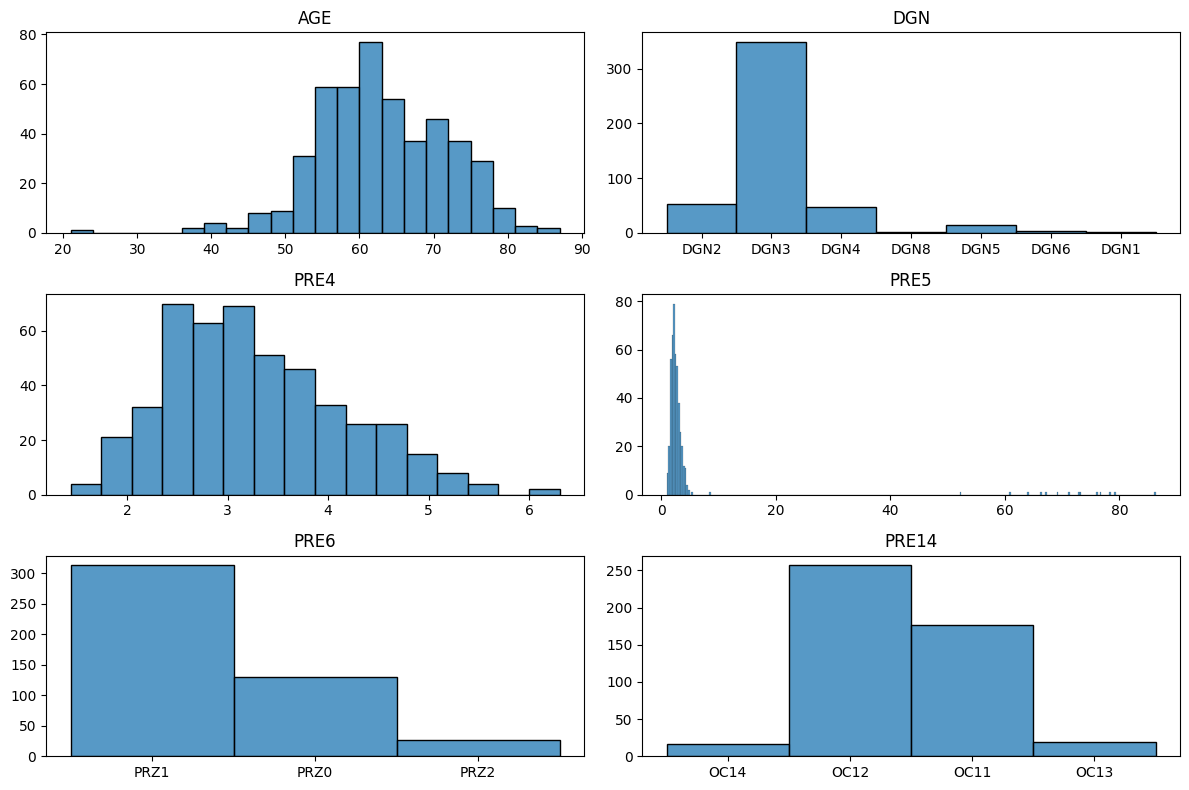

In [144]:
columns = ['AGE', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE14']

fig, axes = pyplot.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

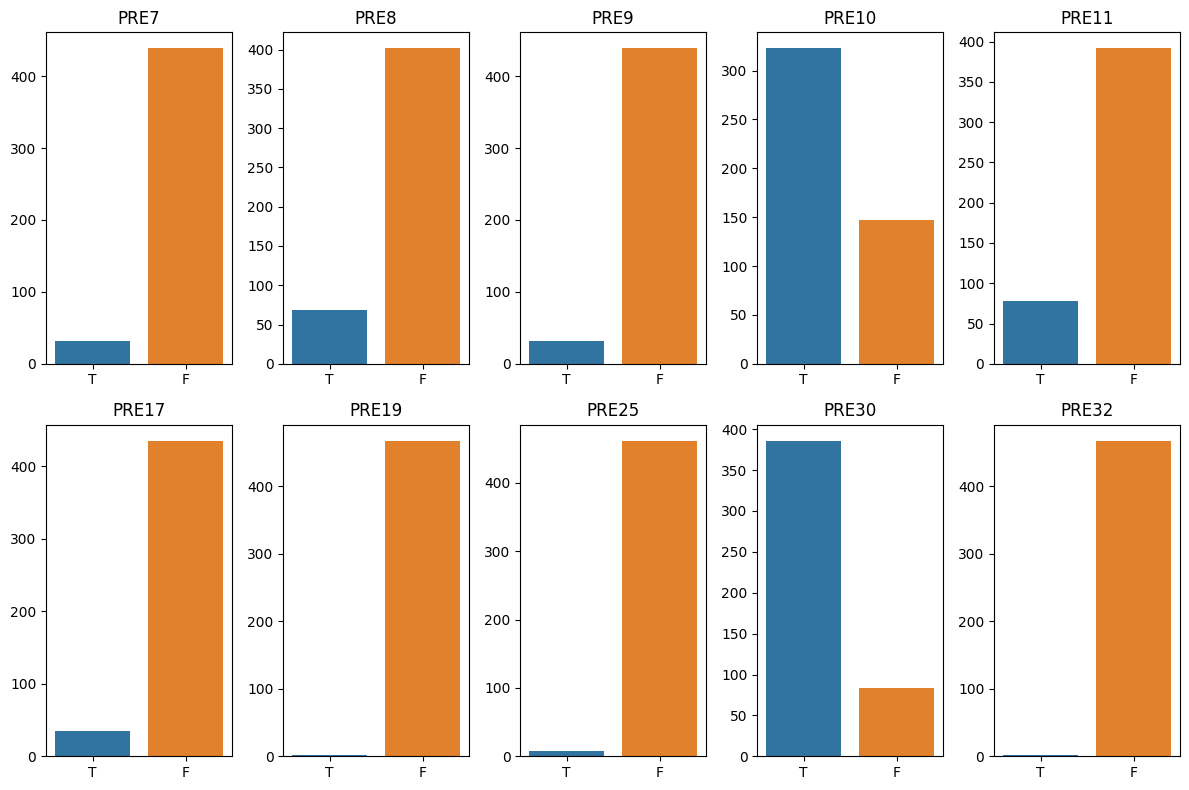

In [145]:
columns = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25','PRE30','PRE32']

fig, axes = pyplot.subplots(2, 5, figsize=(12, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.countplot(x=column_name, data=data, ax=axes[i], order=['T', 'F'], hue_order=['T', 'F'], hue=column_name, legend=False)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()


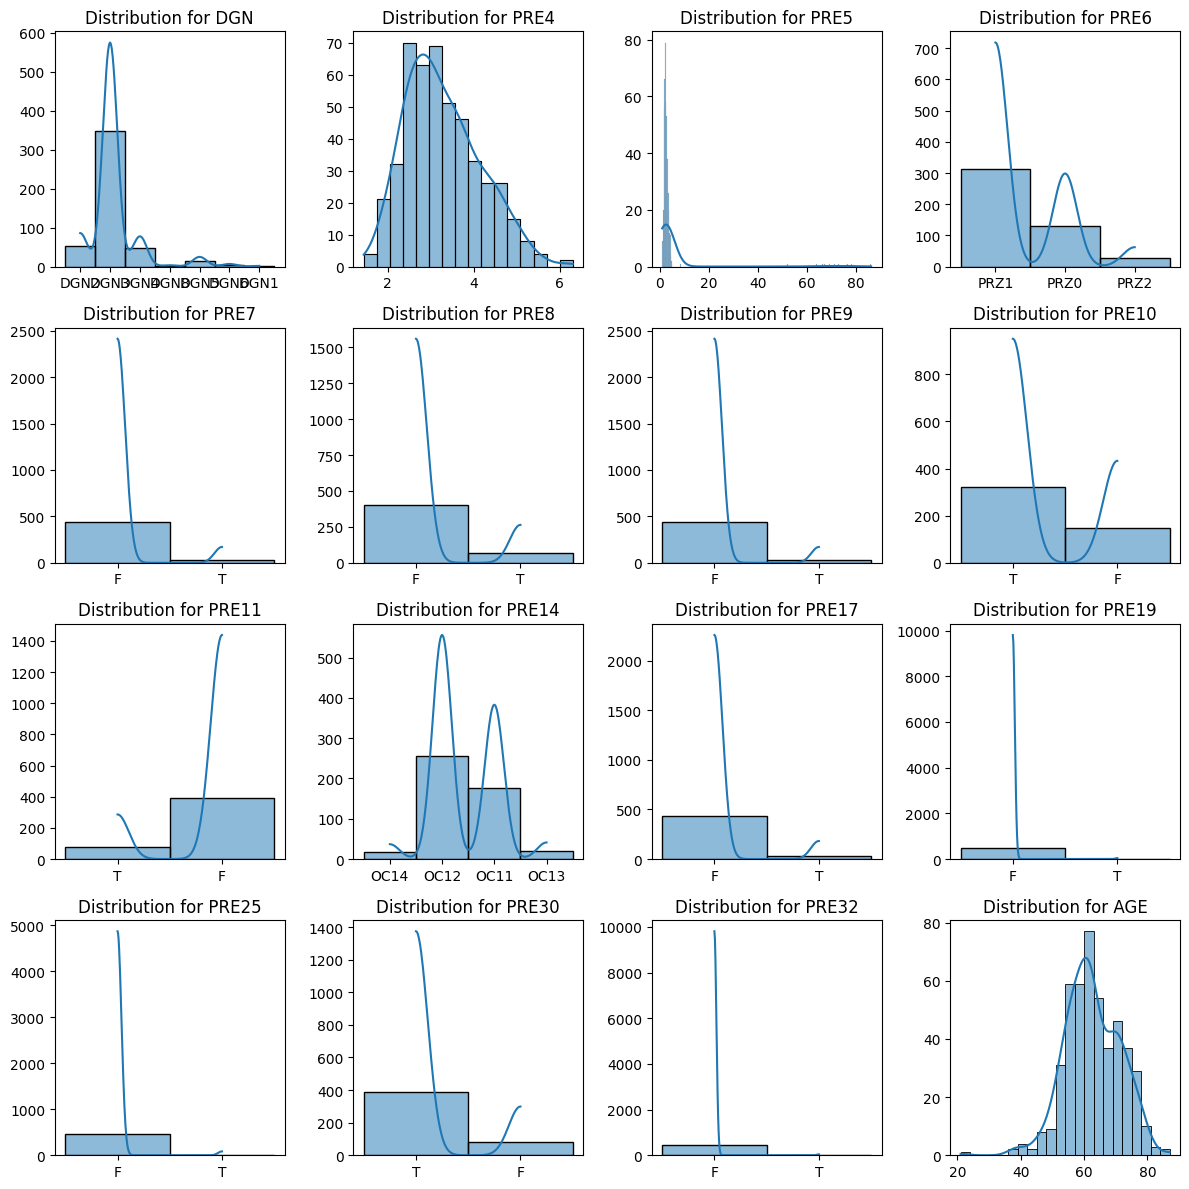

In [146]:
fig, axes = pyplot.subplots(4, 4, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(data.columns[:-1]):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution for {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

pyplot.tight_layout()
pyplot.show()

In [147]:
filtered_data = data1.loc[data1['PRE25'] == 'T', 'Risk1Yr']
filtered_data


7      T
87     F
158    F
172    F
223    F
293    F
367    T
439    F
Name: Risk1Yr, dtype: object

In [148]:
# data1 = data1.drop(columns=['PRE32', 'PRE19', 'PRE25'])
# data1

In [149]:
labels = ['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17','PRE30','Risk1Yr','PRE32', 'PRE19', 'PRE25']
data2 = pd.get_dummies(data=data1, columns=['DGN'], dtype=int)

data2 = pd.get_dummies(data=data2, columns=labels, dtype=int, drop_first=True)

# Create mapper
scale_mapper = {'OC11':1,
 'OC12':2,
 'OC13':3,
 'OC14':4 }

data2["PRE14"] = data2["PRE14"].replace(scale_mapper)

scale_mapper2 = {'PRZ0':1,
 'PRZ1':2,
 'PRZ2':3}

data2["PRE6"] = data2["PRE6"].replace(scale_mapper2)
data2.head()


,PRE4,PRE5,PRE6,PRE14,AGE,DGN_DGN1,DGN_DGN2,DGN_DGN3,DGN_DGN4,DGN_DGN5,...,PRE8_T,PRE9_T,PRE10_T,PRE11_T,PRE17_T,PRE30_T,Risk1Yr_T,PRE32_T,PRE19_T,PRE25_T
0,2.88,2.16,2,4,60,0,1,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,3.40,1.88,1,2,51,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.76,2.08,2,1,59,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,3.68,3.04,1,1,54,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.44,0.96,3,1,73,0,0,1,0,0,...,1,0,1,1,0,1,1,0,0,0


<Axes: >

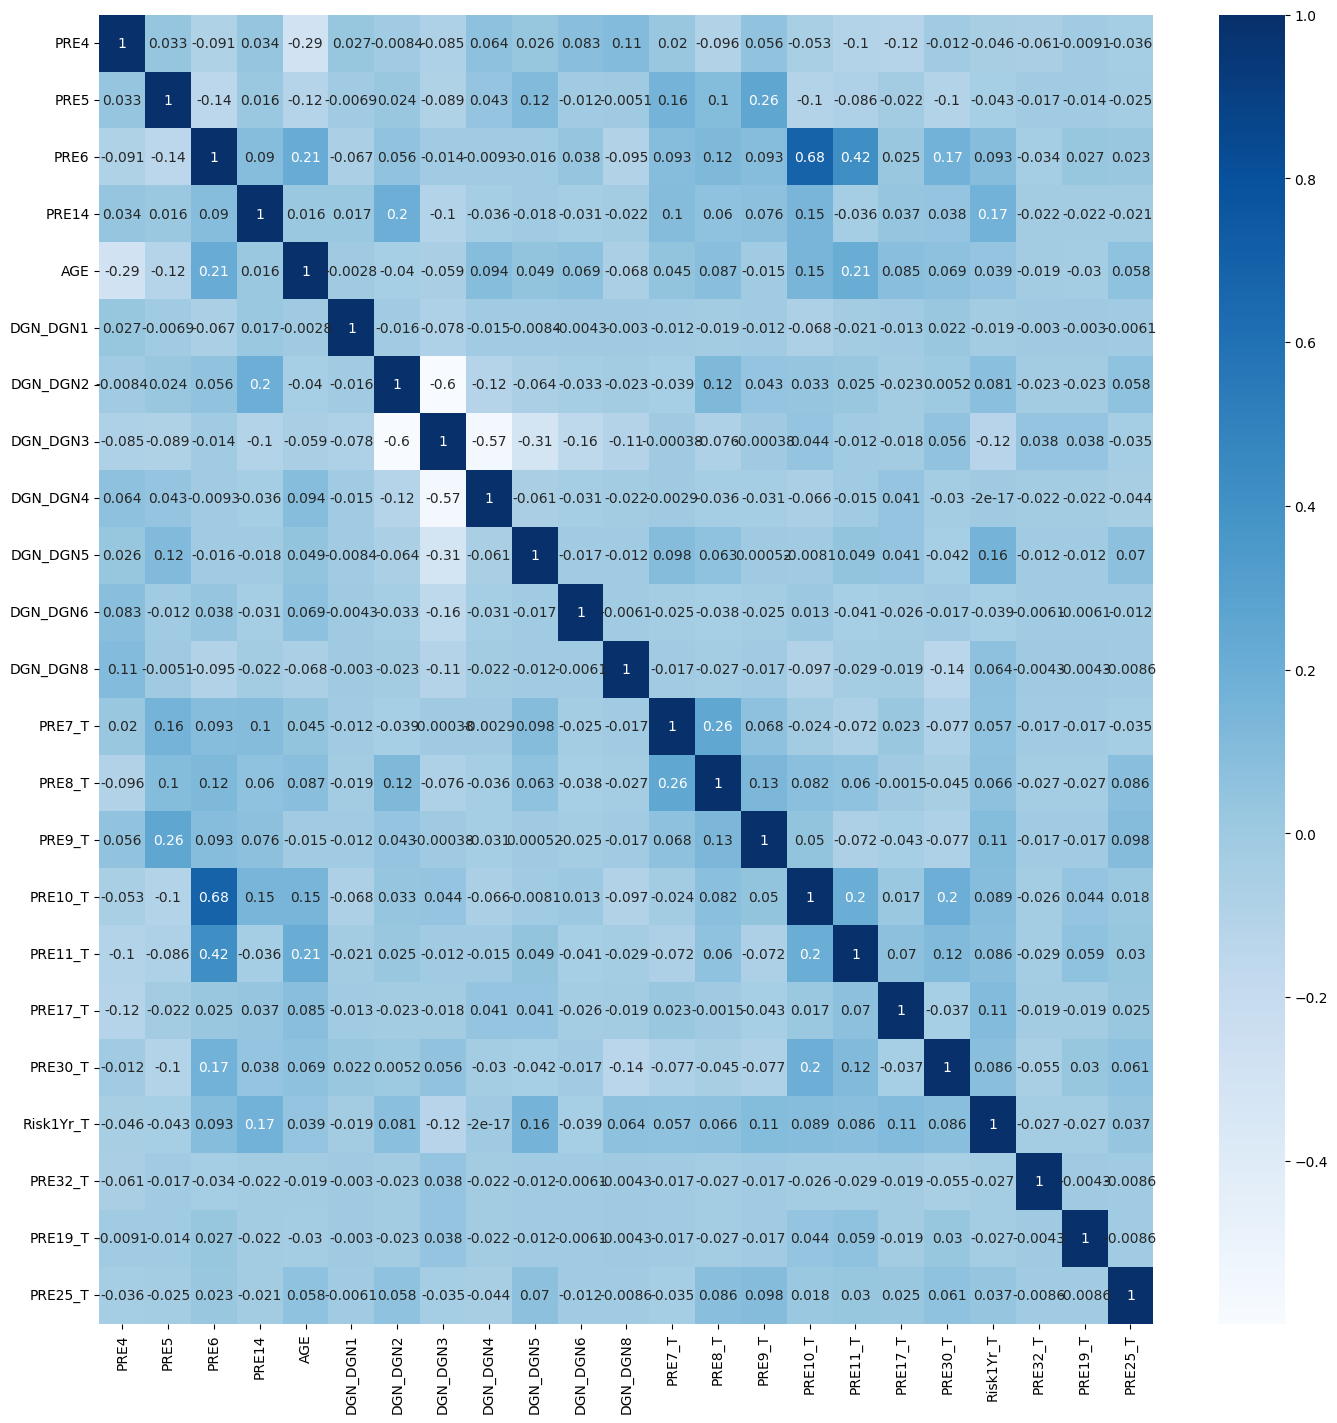

In [150]:
df_corr = data2.corr()
fig, ax = pyplot.subplots(figsize = (17,17))
sns.heatmap(data=df_corr, annot=True, ax=ax, cmap='Blues')

In [151]:
#sve kolone koje nisu konacne
cols = [col for col in data2.columns if col not in ['Risk1Yr_T']]
data_features = data2[cols]
target = data2['Risk1Yr_T']
data_features.head(2)

# Standardize features
standardizer = StandardScaler()
data_features =  standardizer.fit_transform(data_features)


In [152]:

results = {
    'knn': {
        'basic':0,
        'cross':0,
        'balanced':0
    },
    'random forest': {
        'basic':0,
        'cross':0,
        'balanced':0
    },
    'Logistic Regression':{
        'basic':0,
        'cross':0,
        'balanced':0
    },
    "LinearSVC":{
        'basic':0,
        'cross':0,
        'balanced':0
    },
    "BernoulliNB":{
        'basic':0,
        'cross':0,
        'balanced':0
    },
   
    'DecisionTree':{
        'basic':0,
        'cross':0,
        'balanced':0
    }
}



In [153]:

data_train,data_test,target_train,target_test = train_test_split(data_features,target,test_size=0.2,random_state=47)

print(f"Broj uzoraka u trening skupu podataka: {len(data_train)}")
print(f"Broj uzoraka u test skupu podataka: {len(data_test)}")


Broj uzoraka u trening skupu podataka: 376
Broj uzoraka u test skupu podataka: 94


In [154]:

# Create classifier
rf_classifier = RandomForestClassifier()
# Train model
rf_model = rf_classifier.fit(data_train, target_train)
rf_pred = rf_model.predict(data_test)
# Get accuracy score
res = accuracy_score(target_test, rf_pred, normalize = True)
print(" RandomForest accuracy : ", res)

results['random forest']['basic'] = res


 RandomForest accuracy :  0.7978723404255319


In [156]:

from sklearn.feature_selection import SelectFromModel


def selectFeaturesRF(th):
    selector = SelectFromModel(rf_classifier, threshold=th) 

    features_important = selector.fit_transform(data_train, target_train)

    test_important = selector.transform(data_test)

    randomForestModel = rf_classifier.fit(features_important,target_train)

    predRFC = randomForestModel.predict(test_important)
    res = accuracy_score(target_test, predRFC, normalize = True)
    print("RandomForest accuracy : ",res )

selectFeaturesRF(0.032)



RandomForest accuracy :  0.7872340425531915


In [157]:

kfold = KFold(n_splits=10, shuffle=True, random_state=1)


In [158]:

from sklearn.neighbors import KNeighborsClassifier

#dodati scaler
nearest_neighbors = KNeighborsClassifier(n_neighbors=8)

knn_model = nearest_neighbors.fit(data_train,target_train)

predNN = knn_model.predict(data_test)

res=nearest_neighbors.score(data_test, target_test)
print("KNeighbors accuracy : ", res)

results['knn']['basic'] = res


KNeighbors accuracy :  0.7978723404255319


In [159]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(random_state=0)
# Train model
lr_model = logistic_regression.fit(data_train, target_train)

pred_lr = lr_model.predict(data_test)

print("Logistic Regression : ",accuracy_score(target_test, pred_lr, normalize = True))

results['Logistic Regression']['basic'] = accuracy_score(target_test, pred_lr, normalize = True)


Logistic Regression :  0.8085106382978723


In [160]:
from sklearn.svm import LinearSVC, SVC

svc_model = LinearSVC( C=1.0, random_state=0,  dual='auto')

pred = svc_model.fit(data_train, target_train).predict(data_test)

print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

results['LinearSVC']['basic'] = accuracy_score(target_test, pred_lr, normalize = True)

LinearSVC accuracy :  0.8085106382978723


In [161]:
# Naive Bayes


nb_classifer = BernoulliNB()
model = nb_classifer.fit(data_train, target_train).predict(data_test)

print("BernoulliNB : ",accuracy_score(target_test, model, normalize = True))

results['BernoulliNB']['basic'] = accuracy_score(target_test, model, normalize = True)


BernoulliNB :  0.7978723404255319


In [162]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(random_state=0)

predDT = decisionTree.fit(data_train, target_train).predict(data_test)

print("DecisionTree accuracy : ", accuracy_score(target_test, predDT, normalize = True))

results['DecisionTree']['basic'] = accuracy_score(target_test, predDT, normalize = True)

DecisionTree accuracy :  0.7127659574468085


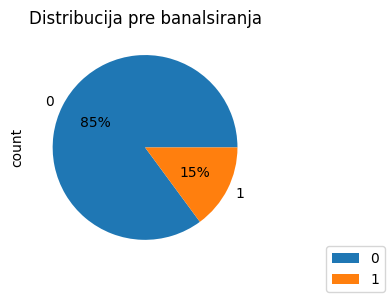

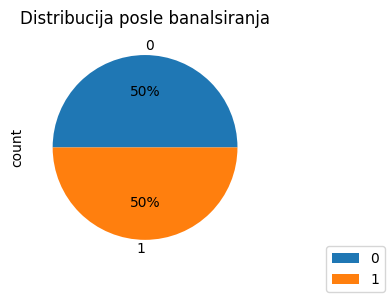

In [187]:
from imblearn.over_sampling import SMOTE

data_pre_smote = pd.DataFrame({'Class': target})
class_counts_pre_smote = data_pre_smote['Class'].value_counts()

pyplot.figure(figsize=(5, 3))
pie_pre_smote = class_counts_pre_smote.plot(kind='pie', autopct='%1.0f%%')
pie_pre_smote.figure.set_size_inches(5, 3)
pie_pre_smote.figure.legend(loc='lower right')
pyplot.title("Distribucija pre banalsiranja")
pyplot.show()

sm = SMOTE(random_state=2)
data_features_res, target_res = sm.fit_resample(data_features, target)

data_post_smote = pd.DataFrame({'Class': target_res})
class_counts_post_smote = data_post_smote['Class'].value_counts()

pyplot.figure(figsize=(5, 3))
pie_post_smote = class_counts_post_smote.plot(kind='pie', autopct='%1.0f%%')
pie_post_smote.figure.set_size_inches(5, 3)
pie_post_smote.figure.legend(loc='lower right')
pyplot.title("Distribucija posle banalsiranja")
pyplot.show()


In [190]:

data_train, data_test, target_train, target_test = train_test_split(data_features_res, target_res, test_size=0.2, random_state=10)


In [165]:
svc_model.fit(data_train, target_train)
# Predikcija na test skupu
pred = svc_model.predict(data_test)
# Evaluacija performansi modela
print("LinearSVC accuracy after SMOTE:  ", (accuracy_score(target_test, pred)))


rf_model.fit(data_train, target_train)
rf_pred = rf_model.predict(data_test)
print("random forest accuracy after SMOTE:  ", (accuracy_score(target_test, rf_pred)))

knn_model.fit(data_train, target_train)
predNN = rf_model.predict(data_test)
print("knn accuracy after SMOTE:  ", (accuracy_score(target_test, predNN)))

predDT = decisionTree.fit(data_train, target_train).predict(data_test)
print("decision tree accuracy after SMOTE:  ", (accuracy_score(target_test, predDT)))


BernoulliNB = nb_classifer.fit(data_train, target_train).predict(data_test)
print("nb accuracy after SMOTE:  ", (accuracy_score(target_test, BernoulliNB)))

lr_model = logistic_regression.fit(data_train, target_train)
pred_lr = lr_model.predict(data_test)
print("linear regression accuracy after SMOTE:  ", (accuracy_score(target_test, pred_lr)))

results['LinearSVC']['balanced'] =accuracy_score(target_test, pred)
results['random forest']['balanced'] =accuracy_score(target_test, rf_pred)
results['knn']['balanced'] =accuracy_score(target_test, predNN)
results['DecisionTree']['balanced'] =accuracy_score(target_test, predDT)
results['BernoulliNB']['balanced'] =accuracy_score(target_test, BernoulliNB)
results['Logistic Regression']['balanced'] =accuracy_score(target_test, pred_lr)

LinearSVC accuracy after SMOTE:   0.71875


random forest accuracy after SMOTE:   0.9
knn accuracy after SMOTE:   0.9
decision tree accuracy after SMOTE:   0.8375
nb accuracy after SMOTE:   0.675
linear regression accuracy after SMOTE:   0.725


In [166]:

from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve

# Kros-validacija
cv_results = cross_validate(rf_model, data_features, target, cv=kfold, scoring='accuracy')
print("Random forest cross validation accuracy: ", cv_results['test_score'])
results['random forest']['cross'] =  np.mean(cv_results['test_score'])


cv_results = cross_validate(knn_model, data_features, target, cv=kfold, scoring='accuracy')
print("KNeighbors cross validation accuracy: ", cv_results['test_score'])
results['knn']['cross'] =  np.mean(cv_results['test_score'])

# Definisanje metrika koje želite koristiti
# scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score), 'roc_auc': make_scorer(roc_auc_score)}
cv_results = cross_validate(logistic_regression, data_features, target, cv=kfold, scoring='accuracy')
print("LogisticRegression cross validation accuracy: ", cv_results['test_score'])
results['Logistic Regression']['cross'] = np.mean(cv_results['test_score'])
# print("Average Accuracy: ", cv_results['test_accuracy'])
# print("Average F1 Score: ", cv_results['test_f1'])
# print("Average ROC AUC: ", cv_results['test_roc_auc'])

cv_results = cross_validate(svc_model, data_features, target, cv=kfold, scoring='accuracy')
print("LinearSVC cross validation accuracy: ", cv_results['test_score'])
results['LinearSVC']['cross'] =  np.mean(cv_results['test_score'])


cv_results = cross_validate(nb_classifer, data_features, target, cv=kfold, scoring='accuracy')
print("BernoulliNB cross validation accuracy: ", cv_results['test_score'])
results['BernoulliNB']['cross'] = np.mean(cv_results['test_score'])

cv_results = cross_validate(decisionTree, data_features, target, cv=kfold, scoring='accuracy')
print("DecisionTree cross validation accuracy: ", cv_results['test_score'])
results['DecisionTree']['cross'] = np.mean(cv_results['test_score'])

Random forest cross validation accuracy:  [0.87234043 0.85106383 0.80851064 0.89361702 0.9787234  0.78723404
 0.87234043 0.72340426 0.82978723 0.91489362]
KNeighbors cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.89361702 0.95744681 0.78723404
 0.87234043 0.70212766 0.82978723 0.87234043]
LogisticRegression cross validation accuracy:  [0.87234043 0.78723404 0.76595745 0.87234043 0.93617021 0.72340426
 0.87234043 0.72340426 0.87234043 0.89361702]
LinearSVC cross validation accuracy:  [0.87234043 0.80851064 0.78723404 0.87234043 0.93617021 0.74468085
 0.87234043 0.72340426 0.87234043 0.89361702]
BernoulliNB cross validation accuracy:  [0.87234043 0.78723404 0.76595745 0.82978723 0.9787234  0.72340426
 0.87234043 0.72340426 0.85106383 0.93617021]
DecisionTree cross validation accuracy:  [0.76595745 0.70212766 0.78723404 0.78723404 0.85106383 0.68085106
 0.78723404 0.70212766 0.80851064 0.80851064]


In [167]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import make_scorer

# Podela skupa podataka
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicijalizacija modela i sklada
# svc_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

# Definisanje metrika koje želite koristiti
scoring = {'accuracy': 'accuracy', 'f1': make_scorer(f1_score), 'roc_auc': make_scorer(roc_auc_score)}
cv_results = cross_validate(logistic_regression, data_features, target, cv=kfold, scoring=scoring)

print("Average Accuracy: ", np.mean(cv_results['test_accuracy']))
print("Average F1 Score: ", np.mean(cv_results['test_f1']))
print("Average ROC AUC: ", np.mean(cv_results['test_roc_auc']))

Average Accuracy:  0.8319148936170212
Average F1 Score:  0.06739130434782609
Average ROC AUC:  0.5103551497318864


In [168]:
pd.DataFrame.from_dict(results)

,knn,random forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree
basic,0.797872,0.797872,0.808511,0.808511,0.797872,0.712766
cross,0.838298,0.853191,0.831915,0.838298,0.834043,0.768085
balanced,0.900000,0.900000,0.725000,0.718750,0.675000,0.837500


Hiperparametri

The Receiving Operating Characteristic (ROC) curve is a common method for evalu‐
ating the quality of a binary classifier. ROC compares the presence of true positives
and false positives at every probability threshold (i.e., the probability at which an
observation is predicted to be a class). By plotting the ROC curve, we can see how the
model performs. A classifier that predicts every observation correctly would look like
the solid light gray line in the following chart, going straight up to the top immedi‐
ately. A classifier that predicts at random will appear as the diagonal line. The better
the model, the closer it is to the solid line. In scikit-learn, we can use roc_curve to
calculate the true and false positives at each threshold, then plot them:

In [169]:

def getRoc(model, key):
    target_probabilities = model.predict_proba(data_test)[:,1]
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

    pred = model.fit(data_train, target_train).predict(data_test)

    f1 = f1_score(target_test, pred) 
    auc = roc_auc_score(target_test, pred)
    acc = accuracy_score(target_test, pred)

    print(key)
    print("Kombinovana F mera je : " , f1)
    print("Podrucje ispod ROC krive je: " , auc)
    print("Accuracy je: " , acc)
    print(confusion_matrix(target_test, pred))

    results[key]['f1'] = f1
    results[key]['ROC'] = auc

    # Plot ROC curve
    pyplot.title("Receiver Operating Characteristic " + key)
    pyplot.plot(false_positive_rate, true_positive_rate)
    pyplot.plot([0, 1], ls="--")
    pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
    pyplot.ylabel("True Positive Rate")
    pyplot.xlabel("False Positive Rate")
    pyplot.show()

Kombinovana F mera je :  0.7204968944099379
Podrucje ispod ROC krive je:  0.7232872407291013
Accuracy je:  0.71875
[[57 29]
 [16 58]]


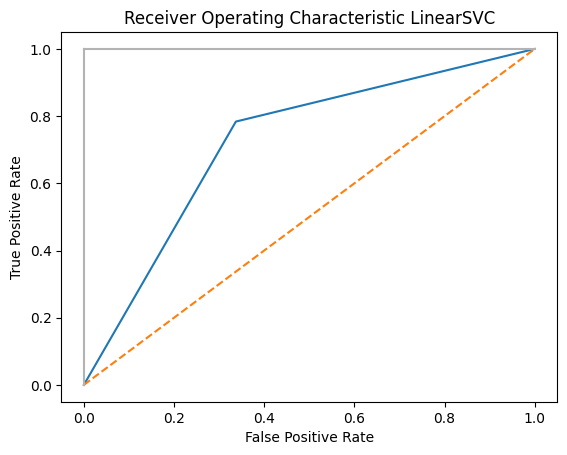

In [170]:
# getRoc(svc_model, 'LinearSVC')

pred = svc_model.fit(data_train, target_train).predict(data_test)

f1 = f1_score(target_test, pred)
auc = roc_auc_score(target_test, pred)
acc = accuracy_score(target_test, pred)

print("Kombinovana F mera je : " , f1)
print("Podrucje ispod ROC krive je: " , auc)
print("Accuracy je: " , acc)
print(confusion_matrix(target_test, pred))

results['LinearSVC']['f1'] = f1
results['LinearSVC']['ROC'] = auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(target_test, pred)

# show the plot
pyplot.show()
pyplot.title("Receiver Operating Characteristic LinearSVC" )
pyplot.plot(false_positive_rate, true_positive_rate)
pyplot.plot([0, 1], ls="--")
pyplot.plot([0, 0], [1, 0] , c=".7"), pyplot.plot([1, 1] , c=".7")
pyplot.ylabel("True Positive Rate")
pyplot.xlabel("False Positive Rate")
pyplot.show()

BernoulliNB
Kombinovana F mera je :  0.6578947368421052
Podrucje ispod ROC krive je:  0.6750471401634192
Accuracy je:  0.675
[[58 28]
 [24 50]]


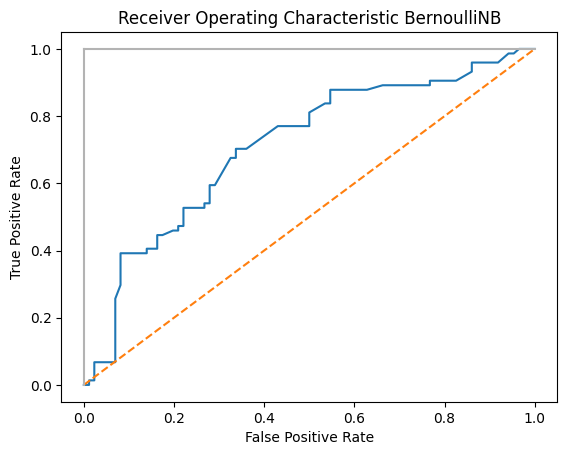

DecisionTree
Kombinovana F mera je :  0.8266666666666665
Podrucje ispod ROC krive je:  0.8375235700817095
Accuracy je:  0.8375
[[72 14]
 [12 62]]


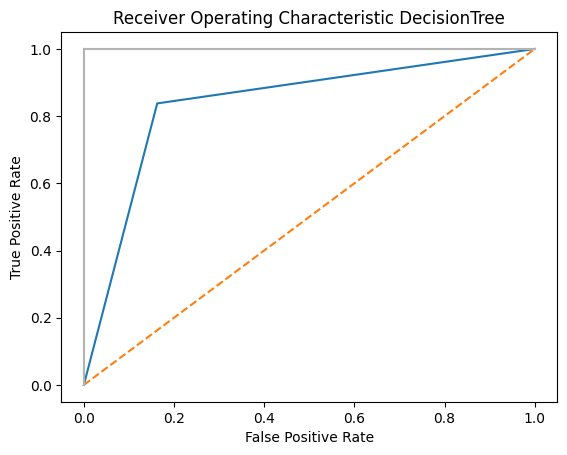

knn
Kombinovana F mera je :  0.7439024390243902
Podrucje ispod ROC krive je:  0.7435575109993715
Accuracy je:  0.7375
[[57 29]
 [13 61]]


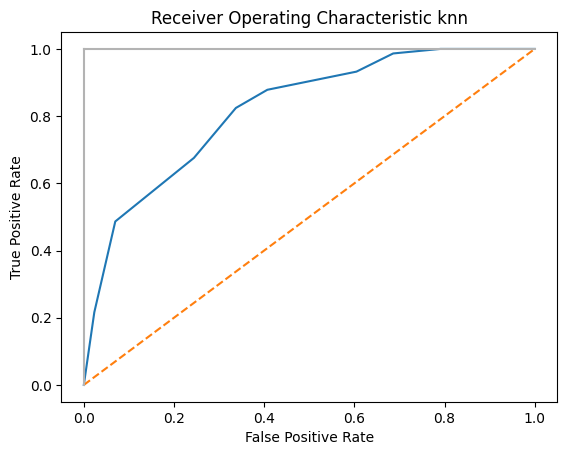

Logistic Regression
Kombinovana F mera je :  0.725
Podrucje ispod ROC krive je:  0.7291011942174733
Accuracy je:  0.725
[[58 28]
 [16 58]]


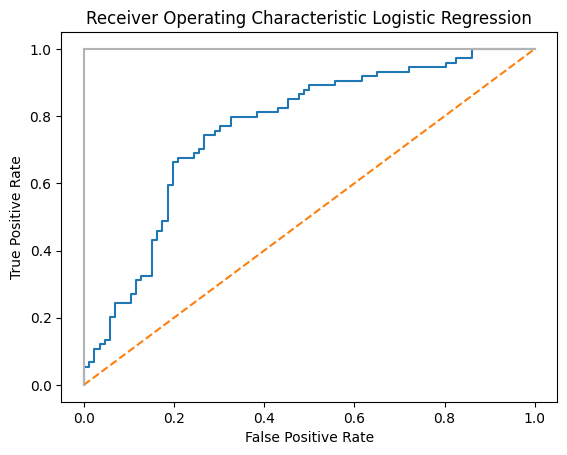

random forest
Kombinovana F mera je :  0.8979591836734694
Podrucje ispod ROC krive je:  0.9052482715273412
Accuracy je:  0.90625
[[79  7]
 [ 8 66]]


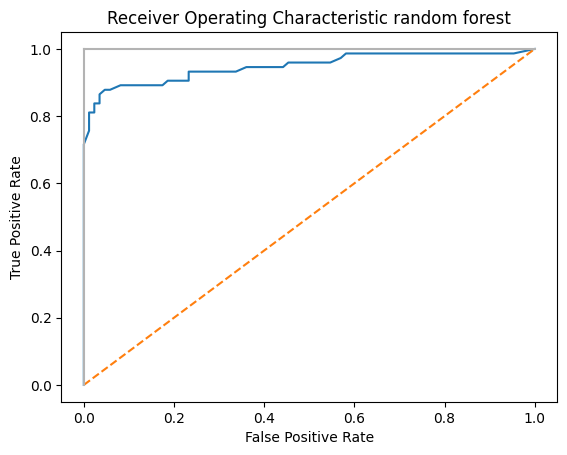

In [171]:

getRoc(nb_classifer, 'BernoulliNB')
getRoc(decisionTree, 'DecisionTree')
getRoc(nearest_neighbors, 'knn')
getRoc(logistic_regression, 'Logistic Regression')
getRoc(rf_classifier, 'random forest')



One GridSearchCV parameter is worth noting: verbose. While mostly unnecessary, it
can be reassuring during long searching processes to receive an indication that the
search is progressing. The verbose parameter determines the amount of messages
outputted during the search, with 0 showing no output, and 1 to 3 outputting mes‐
sages with increasing detail

**scoring**
Strategy to evaluate the performance of the cross-validated model on the test set.
If scoring represents a single score, one can use:
a single string (see The scoring parameter: defining model evaluation rules);
a callable (see Defining your scoring strategy from metric functions) that returns a single value.
If scoring represents multiple scores, one can use:
a list or tuple of unique strings;
a callable returning a dictionary where the keys are the metric names and the values are the metric scores;
a dictionary with metric names as keys and callables a values.

**n_jobsint**, default=None
Number of jobs to run in parallel. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

**cv** int, cross-validation generator or an iterable, default=None
Determines the cross-validation splitting strategy. Possible inputs for cv are:
None, to use the default 5-fold cross validation,
integer, to specify the number of folds in a (Stratified)KFold,
CV splitter,
An iterable yielding (train, test) splits as arrays of indices.
For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used. These splitters are instantiated with shuffle=False so the splits will be the same across calls.
Refer User Guide for the various cross-validation strategies that can be used here.

In [172]:
def findParameters(model, hyperparameters, key):
    grid_search_cv = GridSearchCV(model, hyperparameters, verbose=2, n_jobs=-1, scoring="accuracy")
    best_model = grid_search_cv.fit(data_train, target_train)
    print(best_model.best_params_)
    best_pred = best_model.predict(data_test)
    
    print("Best parameters: ",best_model.best_params_)
    print("Best score: ",best_model.best_score_)

    results[key]['best'] = best_model.best_score_

In [191]:
knn_model = KNeighborsClassifier()

knn_hyperparameters = { 'n_neighbors': list(range(2, 21)),
               'weights': ['uniform','distance'],
               'metric': ['minkowski','euclidean','manhattan']}

findParameters(knn_model, knn_hyperparameters, 'knn')


Fitting 5 folds for each of 114 candidates, totalling 570 fits


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Best parameters:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}
Best score:  0.871875


Hyperparameters of Random Forest Classifier:
1. max_depth: The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node.
2. min_sample_split: Parameter that tells the decision tree in a random forest the minimum required number of observations in any given node to split it. Default = 2
3. max_leaf_nodes: This hyperparameter sets a condition on the splitting of the nodes in the tree and hence restricts the growth of the tree.
4. min_samples_leaf: This Random Forest hyperparameter specifies the minimum number of samples that should be present in the leaf node after splitting a node. Default = 1
5. n_estimators: Number of trees in the forest.
6. max_sample: The max_samples hyperparameter determines what fraction of the original dataset is given to any individual tree.
7. max_features: This resembles the number of maximum features provided to each tree in a random forest.
8. bootstrap: Method for sampling data points (with or without replacement). Default = True
9. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

In [174]:

rf_model = RandomForestClassifier()

rf_hyperparameters = {
                'n_estimators': [ 90, 200, 1000], 
               'criterion':['gini','entropy'],
               'max_depth': [10,50],
               'min_samples_leaf': [4,8],
               'min_samples_split': [2,4],
               'max_features': ['sqrt', 'log2']
               }


# manje granice jer predugo traje
#{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 90}
# 0.8390625
# findParameters(rf_model, rf_hyperparameters, 'random forest')

alphafloat or array-like of shape (n_features,), default=1.0
Additive (Laplace/Lidstone) smoothing parameter (set alpha=0 and force_alpha=True, for no smoothing).

force_alphabool, default=False
If False and alpha is less than 1e-10, it will set alpha to 1e-10. If True, alpha will remain unchanged. This may cause numerical errors if alpha is too close to 0.

New in version 1.2.

Deprecated since version 1.2: The default value of force_alpha will change to True in v1.4.
binarizefloat or None, default=0.0
Threshold for binarizing (mapping to booleans) of sample features. If None, input is presumed to already consist of binary vectors.

fit_priorbool, default=True
Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

class_priorarray-like of shape (n_classes,), default=None
Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.

In [175]:
from sklearn.naive_bayes import BernoulliNB

nb_model = BernoulliNB()

nb_hyperparameters = {
    "alpha": [0, 0.1, 1.0],
                      'binarize':[0, 5, 10]
                      }

findParameters(nb_model, nb_hyperparameters, 'BernoulliNB')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'alpha': 1.0, 'binarize': 0}
Best parameters:  {'alpha': 1.0, 'binarize': 0}
Best score:  0.6484375


criterion: string, optional (default=”gini”): The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
random_state: int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
ccp_alphanon-negative float, default=0.0
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

In [176]:
dt_model = DecisionTreeClassifier()

dt_hyperparameters = {
    'max_depth': [2,  5, 8, 16],
    'min_samples_leaf': range(1,5),
    'min_samples_split': range(2,5),
    'max_features': [None, 'sqrt', 'log2'],
    'ccp_alpha': [0, 0.1, .01],
    'criterion': ["gini", "entropy"]
                      }

findParameters(dt_model, dt_hyperparameters, 'DecisionTree')

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


{'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 16, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best parameters:  {'ccp_alpha': 0, 'criterion': 'gini', 'max_depth': 16, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score:  0.8296875


penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
Specify the norm of the penalty:
None: no penalty is added;
'l2': add a L2 penalty term and it is the default choice;
'l1': add a L1 penalty term;
'elasticnet': both L1 and L2 penalty terms are added.

Cfloat, default=1.0
Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.

In [177]:
lr_model = LogisticRegression()

lr_hyperparameters = {
    'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'penalty':  [None, "l1", "l2", "elasticnet"],
    'C': [100, 10, 1.0, 0.1, 0.01],
                      }

findParameters(lr_model, lr_hyperparameters, 'Logistic Regression')

Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best parameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best score:  0.721875


c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\milica\Desktop\Elfak\Machine learning\venv\lib\site-packages\sklearn\

Cfloat, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples). For an intuitive visualization of different kernel types see Plot classification boundaries with different SVM Kernels.

degreeint, default=3
Degree of the polynomial kernel function (‘poly’). Must be non-negative. Ignored by all other kernels.

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

if ‘auto’, uses 1 / n_features

if float, must be non-negative.

In [178]:
svc_model = SVC()
#degrees = [0, 1, 2, 3, 4, 5, 6]
svc_hyperparameters = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10],
             'kernel': ['rbf','poly','sigmoid', 'linear']}

findParameters(svc_model, svc_hyperparameters, 'LinearSVC')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best parameters:  {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score:  0.8375


In [246]:
svc = SVC(C=10, gamma=0.1,probability=True,kernel='rbf')
#logistic regresion {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
decisionTree = DecisionTreeClassifier(ccp_alpha=0,
                       criterion='gini', max_depth=16, min_samples_split=4, min_samples_leaf=1, 
                       random_state=0)

randomForest = RandomForestClassifier(criterion='entropy', max_depth=50, max_features='log2',min_samples_leaf=4,
                       min_samples_split=2, n_estimators=90)

knn=KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

naive_bayes = BernoulliNB(alpha=1, binarize=0)

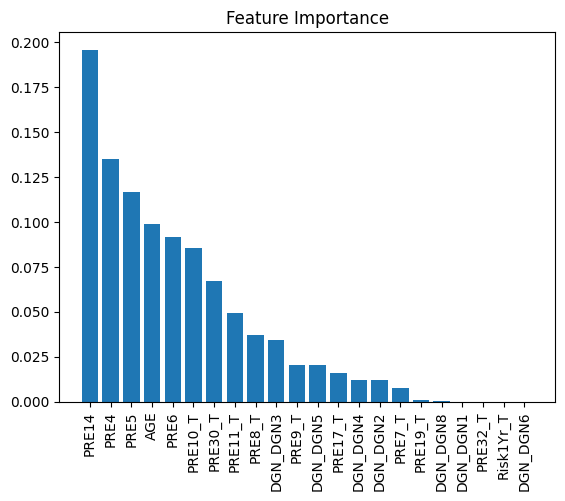

In [247]:

randomForest.fit(data_train, target_train)
importances = randomForest.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data2.columns[i] for i in indices]

pyplot.figure()

pyplot.title("Feature Importance")

pyplot.bar(range(data_train.shape[1]), importances[indices])

pyplot.xticks(range(data_train.shape[1]), names, rotation=90)

pyplot.show()

In [212]:
#balanced data
pca = PCA(n_components=0.99)
data_train_pca = pca.fit_transform(data_train,target_train)
data_test_pca = pca.transform(data_test)
print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_train_pca.shape[1])


Original number of features: 22
Reduced number of features: 20


In [213]:

def PCA_selection(model,modelName):
    modelTrained = model.fit(data_train_pca,target_train)
    prediction = modelTrained.predict(data_test_pca)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test, prediction, normalize = True))
    results[modelName]['pca'] = accuracy_score(target_test, prediction, normalize = True)

PCA_selection(svc,'LinearSVC')
PCA_selection(decisionTree,"DecisionTree")
PCA_selection(randomForest,"random forest")
PCA_selection(knn,"knn")
PCA_selection(naive_bayes,"BernoulliNB")



Best LinearSVC accuracy :  0.83125
Best DecisionTree accuracy :  0.83125
Best random forest accuracy :  0.825
Best knn accuracy :  0.85
Best BernoulliNB accuracy :  0.6125


Variance thresholding (VT) is one of the most basic approaches to feature selection. It
is motivated by the idea that features with low variance are likely less interesting (and
useful) than features with high variance. 

In [214]:
from sklearn.feature_selection import VarianceThreshold

thresholder = VarianceThreshold(threshold=.5)
data_train_VT = thresholder.fit_transform(data_train)
data_test_VT = thresholder.transform(data_test)
print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_train_VT.shape[1])


Original number of features: 22
Reduced number of features: 19


In [206]:

def VT_selection(model,modelName):
    modelTrained = model.fit(data_train_VT,target_train)
    prediction = modelTrained.predict(data_test_VT)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test, prediction, normalize = True))
    results[modelName]['VarianceThreshold'] = accuracy_score(target_test, prediction, normalize = True)

VT_selection(svc,'LinearSVC')
VT_selection(decisionTree,"DecisionTree")
VT_selection(randomForest,"random forest")
VT_selection(knn,"knn")
VT_selection(naive_bayes,"BernoulliNB")

Best LinearSVC accuracy :  0.83125
Best DecisionTree accuracy :  0.825
Best random forest accuracy :  0.84375
Best knn accuracy :  0.84375
Best BernoulliNB accuracy :  0.66875


In [218]:
from sklearn.feature_selection import SelectKBest,SelectPercentile
from sklearn.feature_selection import f_classif

f_classif_selector = SelectPercentile(f_classif, percentile=90)
data_train_sp = f_classif_selector.fit_transform(data_features, target)
data_test_sp = f_classif_selector.transform(data_test)
# Show results
print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_train_sp.shape[1])



Original number of features: 22
Reduced number of features: 19


In [ ]:


# def SelectP_selection(model,modelName):
#     modelTrained = model.fit(data_train,target_train)
#     prediction = modelTrained.predict(data_test)
#     print(f"Best {modelName} accuracy : ",accuracy_score(target_test, prediction, normalize = True))
#     results[modelName]['SelectPercentile'] = accuracy_score(target_test, prediction, normalize = True)

# SelectP_selection(svc,'LinearSVC')
# SelectP_selection(decisionTree,"DecisionTree")
# SelectP_selection(randomForest,"random forest")
# SelectP_selection(knn,"knn")
# SelectP_selection(naive_bayes,"BernoulliNB")

In [245]:
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(data_train, target_train)
# Evaluate model performance on test set
y_pred = lasso.predict(data_test)
print("Model Score: ", lasso.score(data_test, target_test))

model_lasso = linear_model.Lasso(alpha=0.1)
model_lasso.fit(data_train, target_train)

 
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,random_state=0).fit(data_train, target_train)
model = SelectFromModel(lsvc, prefit=True)
data_train_lsvc = model.fit_transform(data_features, target)
data_test_lsvc = model.transform(data_test)
# Show results
print("Original number of features:", data_train.shape[1])
print("Reduced number of features:", data_train_lsvc.shape[1])


Model Score:  0.02101379535634096
Original number of features: 22
Reduced number of features: 7


In [240]:

def get_Lasso_score(estimator,modelName):
    model = estimator.fit(data_train, target_train)
    prediction = model.predict(data_test)
    print(f"Best {modelName} accuracy : ",accuracy_score(target_test, pred, normalize = True))
    results[modelName]['Lasso'] = accuracy_score(target_test, prediction, normalize = True)

get_Lasso_score(svc,'LinearSVC')
get_Lasso_score(decisionTree,"DecisionTree")
get_Lasso_score(randomForest,"random forest")
get_Lasso_score(knn,"knn")
get_Lasso_score(naive_bayes,"BernoulliNB")

Best LinearSVC accuracy :  0.71875
Best DecisionTree accuracy :  0.71875
Best random forest accuracy :  0.71875
Best knn accuracy :  0.71875
Best BernoulliNB accuracy :  0.71875


In [227]:
pd.DataFrame.from_dict(results)

,knn,random forest,Logistic Regression,LinearSVC,BernoulliNB,DecisionTree
basic,0.797872,0.797872,0.808511,0.808511,0.797872,0.712766
cross,0.838298,0.853191,0.831915,0.838298,0.834043,0.768085
balanced,0.900000,0.900000,0.725000,0.718750,0.675000,0.837500
f1,0.743902,0.897959,0.725000,0.720497,0.657895,0.826667
ROC,0.743558,0.905248,0.729101,0.723287,0.675047,0.837524
best,0.871875,NaN,0.721875,0.837500,0.648438,0.829688
pca,0.850000,0.825000,NaN,0.831250,0.612500,0.831250
VarianceThreshold,0.843750,0.843750,NaN,0.831250,0.668750,0.825000
SelectPercentile,0.843750,0.843750,NaN,0.831250,0.675000,0.825000
SelectFromModel,0.843750,0.850000,NaN,0.831250,0.675000,0.825000
